# Logistic Regression with different optimizer

Homework #1 for the **Optimization for Data Science** course of *Prof. Francesco Rinaldi*.

**Required Package**

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

**Optimizers**

In [9]:
class GradientDescent():
    def __init__(self, parameters, lr=0.01, weight_decay=0.001):
        self.prm = parameters
        self.lr = lr
        self.weight_decay = weight_decay
        
    """
    Compute the loss given X, y
    """
    def compute_loss(self, X, y):
        ones = np.ones((1, X.shape[0])) ### Shape: 1, number_of_imputs
        activation = np.dot(X, self.prm.transpose()) ### Shape number_of_inputs, 1
        regularization = self.weight_decay*(np.linalg.norm(self.prm)**2)*0.5 ### Shape: scalar
        
        # Sum [log(1 + exp(-y*XW'))] + 0.5*lambda||W||^2
        loss = np.sum(np.log(ones + np.exp(-y*activation.transpose()))) + regularization ### Shape Scalar
        return loss
        
    """
    Compute gradient
    """
    def compute_gradient(self, X, y):
        first_term = (X.transpose()*y) 
        activation = np.dot(X, self.prm.transpose())
        second_term=(1-1/(1+np.exp(y*activation.transpose())))
        
        gradient = -np.dot(first_term, second_term.transpose()).transpose() + self.weight_decay*self.prm
        return gradient
           
    """
    Main optimization step
    """
    def step(self, X, y):
        ### 1. Compute the loss
        loss = self.compute_loss(X, y)
        ### 2. Compute Gradient
        gradient = self.compute_gradient(X, y)
        ### 3. Do classic gradient descent with fixed stepsize
        self.prm = self.prm - self.lr*gradient/np.linalg.norm(gradient)
        ### 4. Return loss and gradient
        return loss, gradient
    
class SGD():
    """
    TODO: Its a copy and paste of GradientDescent Class. The difference as far i ve understood is that in SGD we just feed
    one example at time. SO the difference in code is only done in the LogisticRegressor.fit method.
    """
    def __init__(self, parameters, lr=0.01, weight_decay=0.001):
        self.prm = parameters
        self.lr = lr
        self.weight_decay = weight_decay
        
    """
    Compute the loss given X, y
    """
    def compute_loss(self, x, y):
        activation = np.dot(x, self.prm.transpose())
        regularization = self.weight_decay*(np.linalg.norm(self.prm)**2)*0.5                   
        loss = np.log(1 + np.exp(-y*activation)) + regularization
        return loss
        
    """
    Compute gradient
    """
    def compute_gradient(self, x, y):
        first_term = x*y
        activation = np.dot(x, self.prm.transpose())
        second_term=(1-1/(1+np.exp(y*activation))
        
        gradient = -np.dot(first_term, second_term.transpose()).transpose() + self.weight_decay*self.prm
        return gradient
           
    """
    Main optimization step
    """
    def step(self, X, y):
        ### 1. Compute the loss
        loss = self.compute_loss(X, y)
        ### 2. Compute Gradient
        gradient = self.compute_gradient(X, y)
        ### 3. Do classic gradient descent with fixed stepsize
        self.prm = self.prm - self.lr*gradient/np.linalg.norm(gradient)
        ### 4. Return loss and gradient
        return loss, gradient
    
class SVRD():
    """
    TODO
    """

**Model**

In [10]:
class LogisticRegressor():
    def __init__(self, input_size, bias=True):
        self.dim = input_size
        self.bias = bias
        self.W = self.init()
        self.is_fit = False
        self.normalized = False
        
    """
    Initialize the weights with normal distribution
    """
    def init(self):
        if self.bias:
            return np.random.randn(1, self.dim+1)
        return np.random.randn(1, self.dim)
        
    """
    Add bias feature
    """
    def add_bias(self, X):
        if self.bias:
            mat = np.zeros((X.shape[0], X.shape[1]+1))
            mat[:, :-1] = X
            mat[:, -1] = 1
            return mat
        else:
            return X
        
    """
    Learn weight given an optimizer and a training set (X, y)
    """
    def fit(self, X, y, optimizer, epoch=100, stop_criterion = 0.01, normalized = True, verbose=0):
        ### 1. Save optimizer
        self.optim = optimizer
        
        ### 2. Add Bias Unit
        X = self.add_bias(X)
        
        ### 3. Choose proper optimizer
        ### CLASSIC
        if type(self.optim) == GradientDescent:
            loss = []
            for ep in range(epoch): 
                ### 3.1 Do a step
                ### 3.1.a Call the optimizer
                tmp_loss, gradient = self.optim.step(X, y)
                loss.append(tmp_loss)
                ### 3.1.b Update parameters
                self.W = self.optim.prm
            
                ### 3.2 Check stopping condition
                """
                TODO
                """  

                ### 3.3 Display current results
                if verbose:
                    print('Step:  {}\t\tLoss: {}'.format(ep, np.round(loss[-1], 5)))
        
        ### SGD
        elif type(self.optim) == SGD:
            loss = []
            for ep in range(epoch):
                ep_loss = []
                for i in range(X.shape[0]):
                    ### 3.1 Do a step
                    ### 3.1.a Call the optimizer
                    tmp_loss, gradient = self.optim.step(X[i, :], y[i])
                    loss.append(tmp_loss)
                    ### 3.1.b Update parameters
                    self.W = self.optim.prm
                    
                    ### 3.2 Check stopping condition
                    """
                    TODO
                    """  
                
                loss.append(np.mean(ep_loss))
                ### 3.3 Display current results
                if verbose:
                    print('Step:  {}\t\tLoss: {}'.format(ep, np.round(loss[-1], 5)))

        
        ### SVRD
        elif type(self.optim) == SVRD:
            """
            TODO
            """
        
        ### NONE
        else:
            print('Please use one of the following optimizer:\nGradientDescent, SGD, SVRD. Returning None')
            return None
        
        
        ### 4. Normalize the outpush such that decision threshold is 0
        if normalized:
            self.normalized = True
            self.get_threshold(X, y)
        
        ### 5. Signal model is fitted
        self.is_fit = True
    
    """
    Predict the data X as a Linear Classifier (X.t*W)
    """    
    def predict(self, X, normalized_output=True):
        ### 1. Check if the model is fitted
        if not self.is_fit:
            print('The model is not fitted. Please run LogisticRegressor.fit(X, y) to fit the model. Returning None')
            return None
        
        ### 2. Add unit bias and forward
        X = self.add_bias(X)
        out = np.dot(X, self.W.transpose()).reshape(-1)
        
        ### 3. Normalize output such that threshold is 0
        if normalized_output:
            if not self.normalized:
                print("Need to call normalize=True in LogisticRegressor.fit() in order to use this option. Return raw output")
                return out
            else:
                return out-self.threshold
                
    """
    Compute the threshold and normalized it to 0
    """
    def get_threshold(self, X, y):
        out = np.dot(X, self.W.transpose()).reshape(-1)
        zeros = out[y == 0]
        ones = out[y == 1]
        self.threshold = (ones.min() + zeros.max())/2
        
        
    """
    String method
    """
    def __str__(self):
        return "Logistic Regressor\n\tNumber of input: {}\n\tBias:\t\t {}\n".format(self.dim, self.bias)

## Testing
**Create Data**

In [11]:
"""
Y shape: 1, n_input
X shape: n_input, n_features
W shape: 1, n_features
"""
training_inputs = 50000
testing_inputs = 5000
number_of_features = 500



"""
Here we create a dataset of random integers. We sum the integers by row and set the target 'y' 1 if the sum is above
the mean of the sum or 0 if the sum is below or equal the mean of the sum.
There is no random noise so it is possible toi reach 1.0 accuracy.
"""
def create_data(from_=0, to_=10, train_shape = (3000, 3), test_shape = (800, 3)):
    if train_shape[1] != test_shape[1]:
        print('Number of features in train differs from number of features in test')
        return None
    X_train, X_test = np.random.randint(from_, to_, train_shape), np.random.randint(from_, to_, test_shape)
    y_train, y_test = np.sum(X_train, axis=1), np.sum(X_test, axis=1)
    mean_y_train, mean_y_test = y_train.mean(), y_test.mean()
    y_train[y_train < mean_y_train] = 0
    y_train[y_train >= mean_y_train] = 1
    y_test[y_test < mean_y_test] = 0
    y_test[y_test >= mean_y_test] = 1 
    
    return (X_train, y_train), (X_test, y_test)

"""
Scale the data between 0 and 1
"""
def normalize_data(X_train, X_test):
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

train, test =  create_data(from_=0, to_=10, 
                           train_shape = (training_inputs, number_of_features), 
                           test_shape  = (testing_inputs, number_of_features))

X_train, X_test = normalize_data(train[0], test[0])

**Fit the model**

In [12]:
### Call the model by giving him the number of features and the option to add a bias unit
reg = LogisticRegressor(input_size=number_of_features, bias=False)
print(reg)
### Call the optimizer with the variable to optimize, the fixed step size and the regularization parameter
optim = GradientDescent(reg.W, lr=10, weight_decay=0.000)

Logistic Regressor
	Number of input: 500
	Bias:		 False



In [13]:
### Call the fit procedure with the chosen optimizer, max number of epochs and batch_size 
start = time.time()
reg.fit(X_train, train[1], optim, epoch=30, verbose=1)
end = time.time()
print('Time spent: {}'.format(end-start))

Step:  0		Loss: 20640.32376
Step:  1		Loss: 17157.47216
Step:  2		Loss: 17157.47216
Step:  3		Loss: 17157.47216
Step:  4		Loss: 17157.47216
Step:  5		Loss: 17157.47216


C:\Users\fgrim\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


Step:  6		Loss: 17157.47216
Step:  7		Loss: 17157.47216
Step:  8		Loss: 17157.47216
Step:  9		Loss: 17157.47216
Step:  10		Loss: 17157.47216
Step:  11		Loss: 17157.47216
Step:  12		Loss: 17157.47216
Step:  13		Loss: 17157.47216
Step:  14		Loss: 17157.47216
Step:  15		Loss: 17157.47216
Step:  16		Loss: 17157.47216
Step:  17		Loss: 17157.47216
Step:  18		Loss: 17157.47216
Step:  19		Loss: 17157.47216
Step:  20		Loss: 17157.47216
Step:  21		Loss: 17157.47216
Step:  22		Loss: 17157.47216
Step:  23		Loss: 17157.47216
Step:  24		Loss: 17157.47216
Step:  25		Loss: 17157.47216
Step:  26		Loss: 17157.47216
Step:  27		Loss: 17157.47216
Step:  28		Loss: 17157.47216
Step:  29		Loss: 17157.47216
Time spent: 19.236940145492554


**Results**

Accuracy score: 0.977


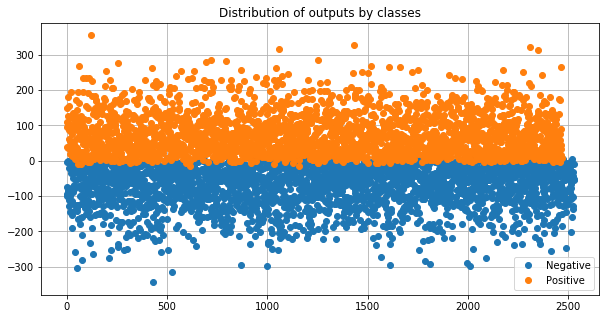

In [15]:
y_pred = reg.predict(X_test)
zeros = y_pred[test[1] == 0]
ones = y_pred[test[1] == 1]
y_pred[y_pred>0] = 1
y_pred[y_pred<=0] = 0
print('Accuracy score: {}'.format(np.round(accuracy_score(y_pred, test[1]), 3)))

plt.figure(figsize=(10, 5))
plt.plot(zeros, 'o', label='Negative')
plt.plot(ones, 'o', label='Positive')
plt.title('Distribution of outputs by classes')
plt.legend()
plt.grid()
plt.show()

**Match the results with the ones obtained by using sklearn**

In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
start=time.time()
model.fit(X_train, train[1])
end = time.time()
print('Time spent: {}'.format(end-start))
y_pred = model.predict_proba(X_test)[:, 0]
zeros = y_pred[test[1] == 0]
ones = y_pred[test[1] == 1]

Time spent: 6.000520467758179


Accuracy score: 0.994


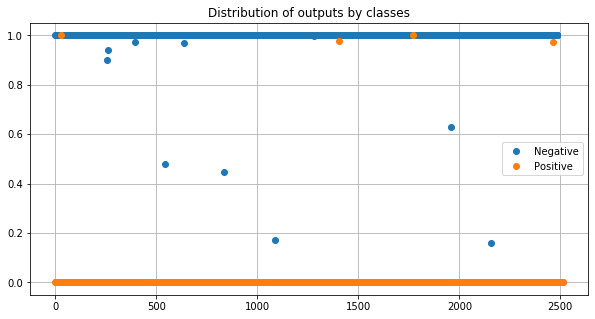

In [70]:
print('Accuracy score: {}'.format(np.round(accuracy_score(np.argmax(model.predict_proba(X_test), axis=1), test[1]), 3)))

plt.figure(figsize=(10, 5))
plt.plot(zeros, 'o', label='Negative')
plt.plot(ones, 'o', label='Positive')
plt.title('Distribution of outputs by classes')
plt.legend()
plt.grid()
plt.show()